In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # importing neccesary ,libraries

In [2]:
Data=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")


In [3]:
Data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#First observation, Data has a lot of null values

In [5]:
Data.isnull().sum() #Checking the total number of null values in each column

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [6]:
#We have total 907 rows and columns like other_fuel 2, other fuel_3, wepp ID,generation_gwh_2013,generation_gwh_2019 and estimated_genration_gwh
#has 907 null values. Hence these columns can be dropped off

In [7]:
Data.drop(["other_fuel2","other_fuel3","wepp_id","generation_gwh_2013","generation_gwh_2019","estimated_generation_gwh"],axis=1,inplace=True)

In [8]:
Data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Similar to the above logic, other_fuel1,commissioning_year,owner,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015
#generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 and generation_data_source have between 380 to 585 null values.
# Imputation of so much of data will lead to incorrect analysis

In [10]:
Data.drop(["other_fuel1","commissioning_year","owner","year_of_capacity_data","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016", "generation_gwh_2017", "generation_gwh_2018","generation_data_source"],axis=1,inplace=True)

In [11]:
Data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Central Electricity Authority,http://www.cea.nic.in/,WRI
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI
...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI


In [12]:
Data.isnull().sum() #Checking the null values

country                0
country_long           0
name                   0
gppd_idnr              0
capacity_mw            0
latitude              46
longitude             46
primary_fuel           0
source                 0
url                    0
geolocation_source    19
dtype: int64

In [13]:
Data["latitude"]=Data["latitude"].fillna(Data["latitude"].mean()) #Filling up the null values for latitiude
Data["longitude"]=Data["longitude"].fillna(Data["longitude"].mean()) #Filling up the null values for longitude
Data["geolocation_source"]=Data["geolocation_source"].fillna(Data["geolocation_source"].mode()[0]) #Filling up the null values for geolocation_source

In [14]:
Data.isnull().sum() #Checking the null values after filling up the null values

country               0
country_long          0
name                  0
gppd_idnr             0
capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
source                0
url                   0
geolocation_source    0
dtype: int64

In [15]:
Data.info() #Checking the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             907 non-null    object 
 1   country_long        907 non-null    object 
 2   name                907 non-null    object 
 3   gppd_idnr           907 non-null    object 
 4   capacity_mw         907 non-null    float64
 5   latitude            907 non-null    float64
 6   longitude           907 non-null    float64
 7   primary_fuel        907 non-null    object 
 8   source              907 non-null    object 
 9   url                 907 non-null    object 
 10  geolocation_source  907 non-null    object 
dtypes: float64(3), object(8)
memory usage: 78.1+ KB


In [16]:
Data['country'].unique() #Checking the unique value of all the object data type

array(['IND'], dtype=object)

In [17]:
Data['country_long'].unique() #Checking the unique value of all the object data type

array(['India'], dtype=object)

In [18]:
Data['name'].unique() #Checking the unique value of all the object data type

array(['ACME Solar Tower', 'ADITYA CEMENT WORKS',
       'AES Saurashtra Windfarms', 'AGARTALA GT', 'AKALTARA TPP',
       'AKRIMOTA LIG', 'ALIYAR', 'ALLAIN DUHANGAN', 'ALMATTI DAM',
       'AMAR KANTAK', 'AMARAVATI TPP', 'ANANDPUR SAHIB ST-I&II',
       'ANAPARA "C"', 'ANDHRA', 'ANOOPGARH ST I&II', 'ANPARA', 'ANTA GT',
       'ANUPPUR', 'ANUPUR TPP', 'ARVINDNAGAR SUGAR', 'ASHOKNAGAR MILL',
       'ATHANI SUGAR', 'AURAIYA GT', 'AVANTHA BHANDAR TPP',
       'AWARPUR CEMENT PLANT', 'Abhijeet', 'Amarsar Solar Power Plant',
       'Anabura Wind Farm', 'Ananthapur - Meil Solar Power Plant',
       'Andrha Lake Wind Farm', 'Anikkadavu Wind Farm',
       'Arasinagundi Wind Farm', 'Askandra - DREPL Solar Power Plant',
       'Askandra - Electromech Maritech Solar Power Plant',
       'Askandra - Finehope Solar Power Plant',
       'Askandra - Khaya Solar Power Plant',
       'Askandra - Newton Solar Power Plant',
       'Askandra - Saidham Solar Power Plant',
       'Askandra - Vasavi Solar Po

In [19]:
Data['gppd_idnr'].unique() #Checking the unique value of all the object data type

array(['WRI1020239', 'WRI1019881', 'WRI1026669', 'IND0000001',
       'IND0000002', 'IND0000003', 'IND0000004', 'IND0000005',
       'IND0000006', 'IND0000007', 'IND0000008', 'IND0000009',
       'IND0000010', 'IND0000011', 'IND0000012', 'IND0000013',
       'IND0000014', 'WRI1019996', 'IND0000015', 'WRI1019938',
       'WRI1019939', 'WRI1019904', 'IND0000016', 'IND0000017',
       'WRI1019940', 'WRI1020238', 'WRI1026104', 'WRI1026069',
       'WRI1026105', 'WRI1026768', 'WRI1026347', 'WRI1026068',
       'WRI1026106', 'WRI1026107', 'WRI1026108', 'WRI1026109',
       'WRI1026110', 'WRI1026111', 'WRI1026112', 'IND0000019',
       'WRI1019905', 'IND0000020', 'IND0000021', 'IND0000022',
       'IND0000023', 'IND0000025', 'IND0000024', 'WRI1019941',
       'WRI1019882', 'IND0000026', 'IND0000027', 'IND0000028',
       'IND0000029', 'IND0000030', 'IND0000031', 'IND0000032',
       'WRI1019883', 'IND0000033', 'IND0000034', 'IND0000035',
       'IND0000036', 'IND0000037', 'IND0000038', 'IND00

In [20]:
Data['primary_fuel'].unique() #Checking the unique value of all the object data type

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [21]:
Data['source'].unique() #Checking the unique value of all the object data type

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

In [22]:
Data['geolocation_source'].unique() #Checking the unique value of all the object data type

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [23]:
#URL is not checked as we do not require links as a contributing factor and will be dropped off
# country and country_long is India hence and is not significant hence dropping of these columns as well

In [24]:
Data.drop(["country","country_long","url"],axis=1,inplace=True)

In [25]:
Data

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,CDM,WRI
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI
...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,WRI
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Industry About
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,CDM,WRI
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,WRI


In [26]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder() #importing necessary libraries to encode the object data type

In [27]:
columns=['name','gppd_idnr','primary_fuel','source','geolocation_source']
Data[columns] = Data[columns].apply(enc.fit_transform) #Encoding all the object data type in Data

In [28]:
Data.info() #Checking the data type after encoding the values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                907 non-null    int32  
 1   gppd_idnr           907 non-null    int32  
 2   capacity_mw         907 non-null    float64
 3   latitude            907 non-null    float64
 4   longitude           907 non-null    float64
 5   primary_fuel        907 non-null    int32  
 6   source              907 non-null    int32  
 7   geolocation_source  907 non-null    int32  
dtypes: float64(3), int32(5)
memory usage: 39.1 KB


In [29]:
Data

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,0,657,2.5,28.1839,73.2407,6,109,1
1,1,519,98.0,24.7663,74.6090,1,174,2
2,2,853,39.2,21.9038,69.3732,7,21,2
3,3,0,135.0,23.8712,91.3602,2,22,2
4,4,1,1800.0,21.9603,82.4091,1,22,2
...,...,...,...,...,...,...,...,...
902,902,491,1600.0,16.2949,77.3568,1,22,2
903,903,822,3.0,12.8932,78.1654,6,77,0
904,904,891,25.5,15.2758,75.5811,7,21,2
905,905,539,80.0,24.3500,73.7477,1,59,2


In [30]:
Data.describe()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,453.000000,453.000000,326.223755,21.197918,77.464907,3.206174,43.847850,1.733186
std,261.972645,261.972645,590.085456,6.079148,4.812291,2.280652,44.642818,0.677151
min,0.000000,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000
25%,226.500000,226.500000,16.725000,17.072000,74.388900,1.000000,22.000000,2.000000
50%,453.000000,453.000000,59.200000,21.281800,76.979200,3.000000,22.000000,2.000000
75%,679.500000,679.500000,385.250000,25.176450,79.206100,6.000000,29.500000,2.000000
max,906.000000,906.000000,4760.000000,34.649000,95.408000,7.000000,190.000000,2.000000


In [31]:
#Apart from latitude,longitude and capacity_mw- all are object datatype so their standard deviation, mean, maximum and minimum value will not matter.
#There is a huge difference between std. deviation and mean as well as in maximum value for capacity_mw and longitude.
# The std. deviation and mean for latitude has a big difference

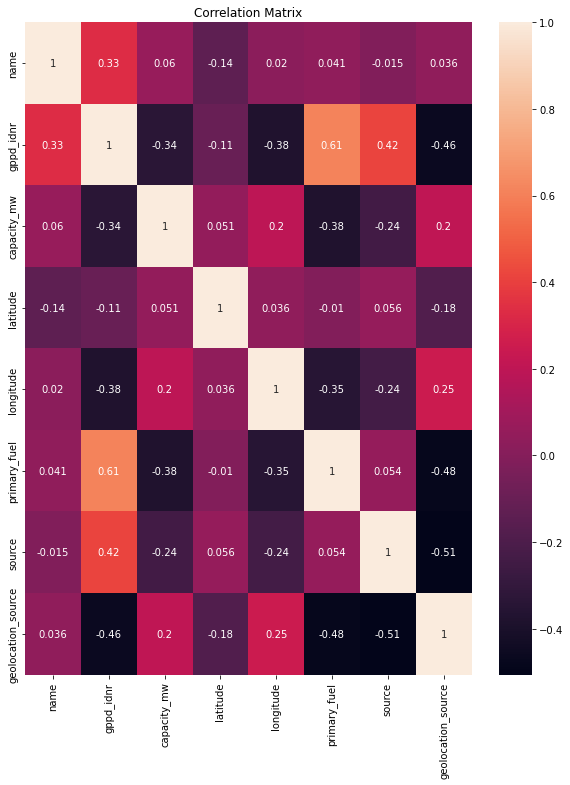

In [32]:
corr_mat=Data.corr()  #Checking correlation
plt.figure(figsize=[10,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show() #Checking correlation

In [33]:
#From the above table- There is not much correlation in any of the columns

In [34]:
vif_data = pd.DataFrame()
vif_data["feature"] = Data.columns
vif_data["VIF"] = [variance_inflation_factor(Data.values, i)
                          for i in range(len(Data.columns))]

vif_data #Checking multicollinearity via VIF

,feature,VIF
0,name,5.185077
1,gppd_idnr,10.581345
2,capacity_mw,1.659938
3,latitude,13.737500
4,longitude,46.335596
5,primary_fuel,6.780087
6,source,3.530147
7,geolocation_source,13.508620


In [35]:
Data.drop("longitude",axis=1,inplace=True)

In [36]:
vif_data = pd.DataFrame()
vif_data["feature"] = Data.columns
vif_data["VIF"] = [variance_inflation_factor(Data.values, i)
                          for i in range(len(Data.columns))]

vif_data #Checking multicollinearity via VIF

,feature,VIF
0,name,4.995595
1,gppd_idnr,10.569538
2,capacity_mw,1.581427
3,latitude,8.586091
4,primary_fuel,5.888918
5,source,3.019266
6,geolocation_source,5.632732


In [37]:
Data

,name,gppd_idnr,capacity_mw,latitude,primary_fuel,source,geolocation_source
0,0,657,2.5,28.1839,6,109,1
1,1,519,98.0,24.7663,1,174,2
2,2,853,39.2,21.9038,7,21,2
3,3,0,135.0,23.8712,2,22,2
4,4,1,1800.0,21.9603,1,22,2
...,...,...,...,...,...,...,...
902,902,491,1600.0,16.2949,1,22,2
903,903,822,3.0,12.8932,6,77,0
904,904,891,25.5,15.2758,7,21,2
905,905,539,80.0,24.3500,1,59,2


In [38]:
X=Data.drop('capacity_mw',axis=1)
Y=Data['capacity_mw']

In [39]:
#X=Feature varible and Y= Target variable

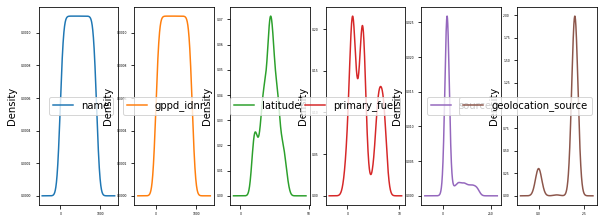

In [40]:
X.plot(kind='kde',subplots=True,layout=(2,6),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() #Checking the skewness of the feature variables

In [41]:
X.skew().sort_values(ascending=False)

source                1.827373
primary_fuel          0.472251
name                  0.000000
gppd_idnr             0.000000
latitude             -0.149698
geolocation_source   -2.159841
dtype: float64

In [42]:
from sklearn.preprocessing import power_transform

In [43]:
X_New=power_transform(X[['latitude','geolocation_source']]) # Transforming the values to reduce skewness

In [44]:
pd.DataFrame(X_New).skew().sort_values(ascending=False)

0   -0.074269
1   -2.132728
dtype: float64

In [45]:
X[["latitude","geolocation_source"]]=pd.DataFrame(X_New) #reassigning the values

In [46]:
X.skew().sort_values(ascending=False) #Checking the skewness after transformation

source                1.827373
primary_fuel          0.472251
name                  0.000000
gppd_idnr             0.000000
latitude             -0.074269
geolocation_source   -2.132728
dtype: float64

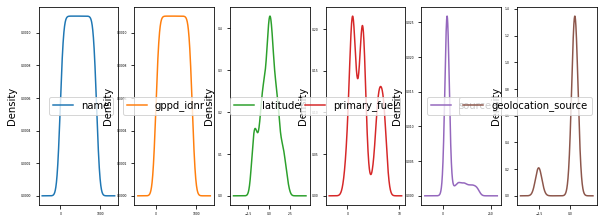

In [47]:
X.plot(kind='kde',subplots=True,layout=(2,6),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() #Checking the skewness after transformation

In [48]:
X.isnull().sum() #Checking if there is any null values

name                  0
gppd_idnr             0
latitude              0
primary_fuel          0
source                0
geolocation_source    0
dtype: int64

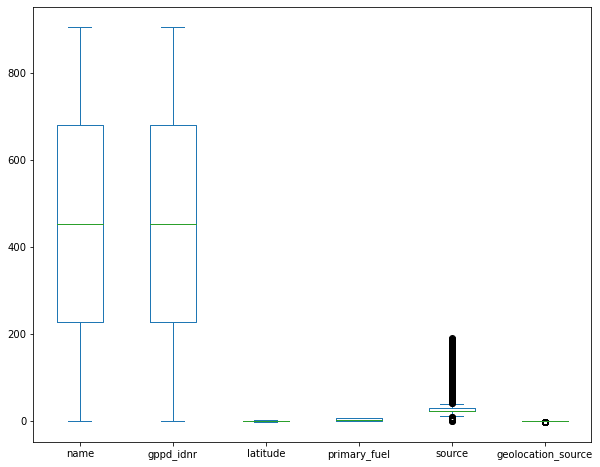

In [49]:
X.plot(kind='box',figsize=(10,8),layout=(6,6))
plt.show() #checking for oultiers

In [50]:
from scipy.stats import zscore

In [51]:
(np.abs(zscore(X)<3)).all()

name                   True
gppd_idnr              True
latitude               True
primary_fuel           True
source                False
geolocation_source     True
dtype: bool

In [52]:
# these are the index positions where outlier is present
index = np.where(np.abs(zscore(X))>3)
index

(array([ 71,  80, 191, 299, 321, 345, 661, 669, 689, 832, 870, 871, 879,
        895, 900], dtype=int64),
 array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64))

In [53]:
# assigning a variable to the values having less than 3 zscore
X_new = X[(np.abs(zscore(X))<3).all(axis=1)]
X_new 

,name,gppd_idnr,latitude,primary_fuel,source,geolocation_source
0,0,657,1.159436,6,109,-2.345400
1,1,519,0.579032,1,174,0.396062
2,2,853,0.099912,7,21,0.396062
3,3,0,0.428491,2,22,0.396062
4,4,1,0.109302,1,22,0.396062
...,...,...,...,...,...,...
902,902,491,-0.817376,1,22,0.396062
903,903,822,-1.357110,6,77,-2.530510
904,904,891,-0.980536,7,21,0.396062
905,905,539,0.508938,1,59,0.396062


In [54]:
X_new.shape #checking the shape of feature variable after removing the data

(892, 6)

In [55]:
Y_new=Y.drop(index[0],axis=0)
Y_new  #removing the outliers from target variables

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 892, dtype: float64

In [56]:
Y_new.shape #checking the shape of target variable after removing the data

(892,)

In [57]:
Scalar=StandardScaler() #scaling the data

In [58]:
X_Scaled=Scalar.fit_transform(X_new)

In [59]:
from sklearn.decomposition import PCA

In [60]:
pca=PCA()


In [61]:
pca=PCA(n_components=6)
new_data=pca.fit_transform(X_Scaled)
Principal_X=pd.DataFrame(new_data,columns=X_new.columns)

# Linear Regression

In [62]:
LR=LinearRegression()

In [63]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(Principal_X,Y_new,test_size=0.20,random_state=i)
    LR.fit(X_train,y_train)
    pred_test=LR.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',r2_score(y_test,pred_test)*100)
    print("/n")

At random state 0 the testing accurancy is:- 17.69892186798807
/n
At random state 1 the testing accurancy is:- 12.110919662991693
/n
At random state 2 the testing accurancy is:- 19.37492799778403
/n
At random state 3 the testing accurancy is:- 21.199489263266646
/n
At random state 4 the testing accurancy is:- 21.332160920684153
/n
At random state 5 the testing accurancy is:- 22.936339695537622
/n
At random state 6 the testing accurancy is:- 21.25816893387784
/n
At random state 7 the testing accurancy is:- 18.823360604115525
/n
At random state 8 the testing accurancy is:- 20.25053102970307
/n
At random state 9 the testing accurancy is:- 18.107245014085805
/n
At random state 10 the testing accurancy is:- 19.72964022254322
/n
At random state 11 the testing accurancy is:- 28.753376133327336
/n
At random state 12 the testing accurancy is:- 17.143594625282244
/n
At random state 13 the testing accurancy is:- 24.604075644463343
/n
At random state 14 the testing accurancy is:- 25.57878847042370

# Random Forest Regressor

In [64]:
RF=RandomForestRegressor()

In [65]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(Principal_X,Y_new,test_size=0.20,random_state=i)
    RF.fit(X_train,y_train)
    pred_test=RF.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',r2_score(y_test,pred_test)*100)
    print("/n")

At random state 0 the testing accurancy is:- 49.03968852980538
/n
At random state 1 the testing accurancy is:- 25.317405682895643
/n
At random state 2 the testing accurancy is:- 32.676470683283576
/n
At random state 3 the testing accurancy is:- 43.83041758422607
/n
At random state 4 the testing accurancy is:- 36.698266655921394
/n
At random state 5 the testing accurancy is:- 56.17657532307443
/n
At random state 6 the testing accurancy is:- 35.446937733465944
/n
At random state 7 the testing accurancy is:- 37.283070368264426
/n
At random state 8 the testing accurancy is:- 25.37827062174398
/n
At random state 9 the testing accurancy is:- 43.91015109598829
/n
At random state 10 the testing accurancy is:- 5.151894568273086
/n
At random state 11 the testing accurancy is:- 51.27580416759832
/n
At random state 12 the testing accurancy is:- 33.5463701264742
/n
At random state 13 the testing accurancy is:- 45.69398370136032
/n
At random state 14 the testing accurancy is:- 18.392319344680796
/n


In [66]:
X_train,X_test,y_train,y_test=train_test_split(Principal_X,Y_new,test_size=0.20,random_state=39)
RF.fit(X_train,y_train)
pred_test=RF.predict(X_test)

In [67]:
RF_Score= r2_score(y_test,pred_test)*100
RF_Score

61.584899403284425

# Gradient Boosting

In [68]:
GB=GradientBoostingRegressor()

In [69]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(Principal_X,Y_new,test_size=0.20,random_state=i)
    GB.fit(X_train,y_train)
    pred_test=GB.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',r2_score(y_test,pred_test)*100)
    print("/n")

At random state 0 the testing accurancy is:- 45.17269962193097
/n
At random state 1 the testing accurancy is:- 25.533030388475318
/n
At random state 2 the testing accurancy is:- 37.79859118519037
/n
At random state 3 the testing accurancy is:- 44.22229623241879
/n
At random state 4 the testing accurancy is:- 49.94662843963478
/n
At random state 5 the testing accurancy is:- 46.516199505805666
/n
At random state 6 the testing accurancy is:- 32.43546636379262
/n
At random state 7 the testing accurancy is:- 32.9224132260022
/n
At random state 8 the testing accurancy is:- 24.929709668573842
/n
At random state 9 the testing accurancy is:- 37.81952622214278
/n
At random state 10 the testing accurancy is:- 21.09762955239116
/n
At random state 11 the testing accurancy is:- 46.52670180047309
/n
At random state 12 the testing accurancy is:- 28.611522909894806
/n
At random state 13 the testing accurancy is:- 34.23771841517367
/n
At random state 14 the testing accurancy is:- 24.664032023707605
/n
A

In [70]:
X_train,X_test,y_train,y_test=train_test_split(Principal_X,Y_new,test_size=0.20,random_state=37)
GB.fit(X_train,y_train)
pred_test=GB.predict(X_test)

In [71]:
GB_Score= r2_score(y_test,pred_test)*100
GB_Score

51.081059591550336

# Lasso Regression

In [72]:
from sklearn.linear_model import Lasso,LassoCV

In [73]:
LassCV=LassoCV(alphas=None,max_iter=100,normalize=True)
LassCV.fit(X_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [74]:
alpha=LassCV.alpha_
alpha #getting the correct alpha value

0.16298861480152144

In [75]:
LassReg=Lasso(alpha)
LassReg.fit(X_train,y_train) #Training the model with correct alpha value

Lasso(alpha=0.16298861480152144)

In [76]:
Lass_predict=LassReg.predict(X_test)

In [77]:
LassReg_Score=r2_score(y_test,Lass_predict)*100
LassReg_Score

30.676030163218314

# Cross Validation for LR

In [78]:
for i in range(2,10):
    LR_Val=cross_val_score(LR,Principal_X,Y_new,cv=i)
    print("The cross validation score for",i,"is",LR_Val.mean())

The cross validation score for 2 is 0.16831805435642
The cross validation score for 3 is 0.1929605404844987
The cross validation score for 4 is 0.1989517022732717
The cross validation score for 5 is 0.20413357455141545
The cross validation score for 6 is 0.20141641868194274
The cross validation score for 7 is 0.2065674054249166
The cross validation score for 8 is 0.20512977248766368
The cross validation score for 9 is 0.20702682619373644


# Cross Validation for RF

In [79]:
for i in range(2,10):
    RF_Val=cross_val_score(RF,Principal_X,Y_new,cv=i)
    print("The cross validation score for",i,"is",RF_Val.mean()*100)

The cross validation score for 2 is 19.689516176947542
The cross validation score for 3 is 15.916549722058884
The cross validation score for 4 is 28.088729908120513
The cross validation score for 5 is 28.37486801365167
The cross validation score for 6 is 24.53149650749952
The cross validation score for 7 is 26.7625655137198
The cross validation score for 8 is 27.809940503987292
The cross validation score for 9 is 36.681199425614885


# Cross Validation for GB

In [80]:
for i in range(2,10):
    GB_Val=cross_val_score(GB,Principal_X,Y_new,cv=i)
    print("The cross validation score for",i,"is",GB_Val.mean()*100)

The cross validation score for 2 is -3.4875712847525
The cross validation score for 3 is 5.085784526611503
The cross validation score for 4 is 17.581155346862623
The cross validation score for 5 is 28.908837491011006
The cross validation score for 6 is 21.99986346517715
The cross validation score for 7 is 25.302148930569402
The cross validation score for 8 is 30.1542199792305
The cross validation score for 9 is 30.229373904163097


# Cross Validation for Lass Reg

In [81]:
for i in range(2,10):
    LassReg_Val=cross_val_score(LassReg,Principal_X,Y_new,cv=i)
    print("The cross validation score for",i,"is",LassReg_Val.mean()*100)

The cross validation score for 2 is 16.850428806197037
The cross validation score for 3 is 19.30289605949059
The cross validation score for 4 is 19.905812899592764
The cross validation score for 5 is 20.421701024238814
The cross validation score for 6 is 20.15285243589057
The cross validation score for 7 is 20.664067837417786
The cross validation score for 8 is 20.522622619942304
The cross validation score for 9 is 20.716582036427944


In [91]:
#Model is overfitted, however going with random forest classifier as it gives the highest score at random state 39 which is 61.58%

# Hypertuning Parameter

In [83]:
RFC=RandomForestRegressor()

In [85]:
parameters={'max_depth':(list(range(10,11))),'min_samples_split':(list(range(4,5))),'min_samples_leaf':(list(range(2,3)))}
clf=GridSearchCV(RFC,parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10], 'min_samples_leaf': [2],
                         'min_samples_split': [4]})

In [86]:
clf.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4}

In [87]:
RFC=RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=4)

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=39)
RFC.fit(X_train,y_train)
pred_test=RFC.predict(X_test)

In [93]:
RFC_Score=r2_score(y_test,pred_test)
RFC_Score

0.6170356027551493

In [100]:
#There was not much improvement in the score, hence trying with few more parameters

In [97]:
RFC=RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=3)

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=39)
RFC.fit(X_train,y_train)
pred_test=RFC.predict(X_test)

In [99]:
RFC_Score=r2_score(y_test,pred_test)
RFC_Score

0.6244363090890311

In [101]:
##Score Increased

# Saving the model

In [102]:
import pickle
filename='Global Power Plant.pkl'
pickle.dump(RFC,open(filename,'wb'))